# Results for the toygraph experiment

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re

# Function to load all results of a given type
def load_results(base_path, regex):
    results = []
    for filename in os.listdir(base_path):
        if bool(re.match(regex, filename)):
            with open(os.path.join(base_path, filename), 'rb') as file:
                results.append(pickle.load(file))
    return results

# Function to compute statistics across runs
def aggregate_results(results, key):
    all_data = [res[key] for res in results if key in res]
    mean_data = np.mean(all_data, axis=0)
    std_dev_data = np.std(all_data, axis=0)
    return mean_data, std_dev_data


def plot_everything(base_path, experiment, noiseless: bool = True, save_file: bool = False):
    # Determine the string suffix based on the noiseless flag
    if noiseless:
        noisy_suffix = r'\.pickle'
        noisy_string = ""
    else:
        noisy_suffix = r'_noisy\.pickle'
        noisy_string = "_noisy"
        
    # CEO results
    ceo_results = load_results(base_path, r'.*_ceo.*results' + noisy_suffix)
    ceo_mean, ceo_std = aggregate_results(ceo_results, experiment)
    
    # BO results
    bo_results = load_results(base_path, r'.*_bo.*results' + noisy_suffix)
    bo_mean, bo_std = aggregate_results(bo_results, experiment)

    # CBO results for each graph (no loop, hard-coded as requested)
    cbo_graph0_results = load_results(base_path, r'.*_cbo.*graph_0' + noisy_suffix)
    cbo_graph0_mean, cbo_graph0_std = aggregate_results(cbo_graph0_results, experiment)

    cbo_graph1_results = load_results(base_path, r'.*_cbo.*graph_1' + noisy_suffix)
    cbo_graph1_mean, cbo_graph1_std = aggregate_results(cbo_graph1_results, experiment)

    cbo_graph2_results = load_results(base_path, r'.*_cbo.*graph_2' + noisy_suffix)
    cbo_graph2_mean, cbo_graph2_std = aggregate_results(cbo_graph2_results, experiment)

    cbo_graph3_results = load_results(base_path, r'.*_cbo.*graph_3' + noisy_suffix)
    cbo_graph3_mean, cbo_graph3_std = aggregate_results(cbo_graph3_results, experiment)

    cbo_graph4_results = load_results(base_path, r'.*_cbo.*graph_4' + noisy_suffix)
    cbo_graph4_mean, cbo_graph4_std = aggregate_results(cbo_graph4_results, experiment)

    cbo_graph5_results = load_results(base_path, r'.*_cbo.*graph_5' + noisy_suffix)
    cbo_graph5_mean, cbo_graph5_std = aggregate_results(cbo_graph5_results, experiment)

    cbo_graph6_results = load_results(base_path, r'.*_cbo.*graph_6' + noisy_suffix)
    cbo_graph6_mean, cbo_graph6_std = aggregate_results(cbo_graph6_results, experiment)

    # Plotting results using fill_between
    x_values = range(len(ceo_mean))
    plt.fill_between(x_values, ceo_mean - ceo_std, ceo_mean + ceo_std, alpha=0.2)
    plt.plot(x_values, ceo_mean, label='CEO Mean')

    x_values = range(len(cbo_graph0_mean))
    plt.fill_between(x_values, cbo_graph0_mean - cbo_graph0_std, cbo_graph0_mean + cbo_graph0_std, alpha=0.2)
    plt.plot(x_values, cbo_graph0_mean, label='CBO Graph 0')

    x_values = range(len(cbo_graph1_mean))
    plt.fill_between(x_values, cbo_graph1_mean - cbo_graph1_std, cbo_graph1_mean + cbo_graph1_std, alpha=0.2)
    plt.plot(x_values, cbo_graph1_mean, label='CBO Graph 1')

    x_values = range(len(cbo_graph4_mean))
    plt.fill_between(x_values, cbo_graph4_mean - cbo_graph4_std, cbo_graph4_mean + cbo_graph4_std, alpha=0.2)
    plt.plot(x_values, cbo_graph4_mean, label='CBO Graph 4')

    x_values = range(len(cbo_graph6_mean))
    plt.fill_between(x_values, cbo_graph6_mean - cbo_graph6_std, cbo_graph6_mean + cbo_graph6_std, alpha=0.2)
    plt.plot(x_values, cbo_graph6_mean, label='CBO Graph 6')

    # plt.title('Mean and Standard Deviation of Best Y across Runs')
    plt.xlabel('Trial')
    plt.ylabel('Y value')
    plt.legend()
    if save_file:
        filename = f"{base_path}/{experiment}{noisy_string}"
        plt.savefig(filename)
    plt.show()


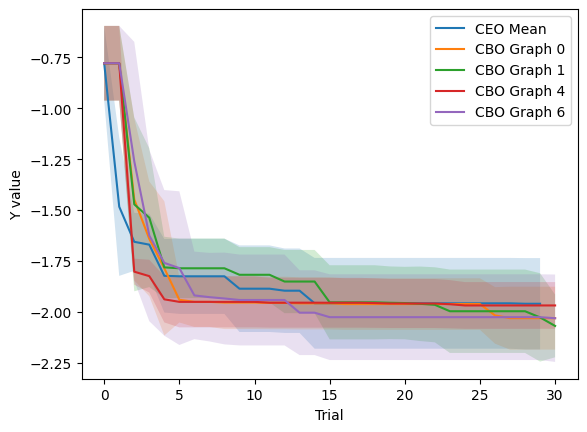

In [2]:
# Load results for each experiment type
base_path = 'ToyGraph'
plot_everything(base_path, 'Best_Y', save_file=True)

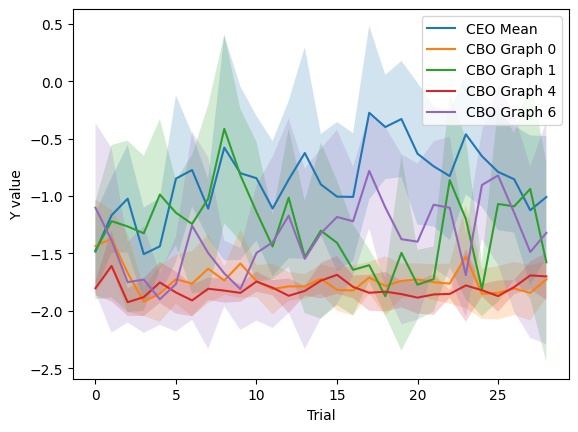

In [3]:
# Load results for each experiment type
base_path = 'ToyGraph'
plot_everything(base_path, 'Per_trial_Y', save_file=True)

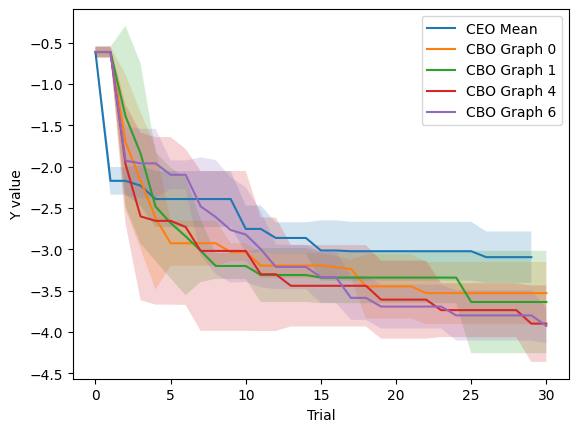

In [4]:
# Load results for each experiment type
base_path = 'ToyGraph'
plot_everything(base_path, 'Best_Y', noiseless=False, save_file=True)

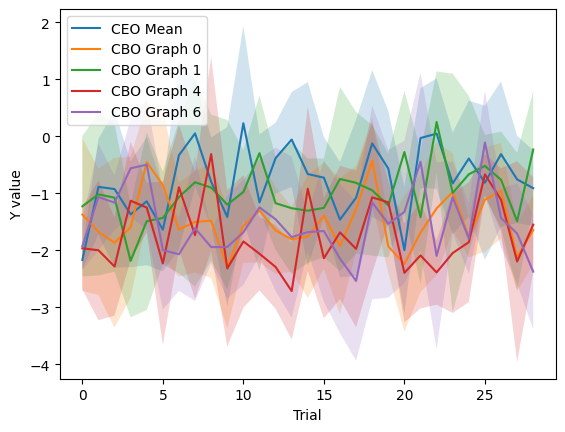

In [5]:
# Load results for each experiment type
base_path = 'ToyGraph'
plot_everything(base_path, 'Per_trial_Y', noiseless=False, save_file=True)

In [5]:
import pickle
with open("ToyGraph/run_ceo_2_results_noisy.pickle", "rb") as file:
    cbo_results = pickle.load(file)

In [7]:
cbo_results["Cost"]

array([ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
       25., 26., 27., 28., 29.])